In [1]:
# ドライブのマウント
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#必要なライブラリのインストールやインポート
!pip install japanize-matplotlib
import pandas as pd
%matplotlib inline
import japanize_matplotlib
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [3]:
#★★実装機能要件
#★★１．CSVファイルの読み込みと表示。

#csvの読み込みと、中身の確認（全部で8124行のデータ）
df = pd.read_csv('drive/MyDrive/csv/mushrooms.csv',encoding="cp932")
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,poisonous,convex,smooth,brown,yes,pungent,free,close,narrow,black,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
1,edible,convex,smooth,yellow,yes,almond,free,close,broad,black,...,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
2,edible,bell,smooth,white,yes,anise,free,close,broad,brown,...,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
3,poisonous,convex,scaly,white,yes,pungent,free,close,narrow,brown,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
4,edible,convex,smooth,gray,no,none,free,crowded,broad,black,...,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,edible,knobbed,smooth,brown,no,none,attached,close,broad,yellow,...,smooth,orange,orange,partial,orange,one,pendant,buff,clustered,leaves
8120,edible,convex,smooth,brown,no,none,attached,close,broad,yellow,...,smooth,orange,orange,partial,brown,one,pendant,buff,several,leaves
8121,edible,flat,smooth,brown,no,none,attached,close,broad,brown,...,smooth,orange,orange,partial,orange,one,pendant,buff,clustered,leaves
8122,poisonous,knobbed,scaly,brown,no,fishy,free,close,narrow,buff,...,silky,white,white,partial,white,one,evanescent,white,several,leaves


In [4]:
# データの種類の確認（質的データの確認）
for list in df:
  print()
  print('【{}】:【{}種類】'.format(list, len(df[list].value_counts())))
  print(df[list].value_counts())


【class】:【2種類】
edible       4208
poisonous    3916
Name: class, dtype: int64

【cap-shape】:【6種類】
convex     3656
flat       3152
knobbed     828
bell        452
sunken       32
conical       4
Name: cap-shape, dtype: int64

【cap-surface】:【4種類】
scaly           3244
smooth          2556
fibrous         2320
groovesmooth       4
Name: cap-surface, dtype: int64

【cap-color】:【10種類】
brown       2284
gray        1840
red         1500
yellow      1072
white       1040
buff         168
pink         144
cinnamon      44
purple        16
green         16
Name: cap-color, dtype: int64

【bruises】:【2種類】
no     4748
yes    3376
Name: bruises, dtype: int64

【odor】:【9種類】
none        3528
foul        2160
fishy        576
spicy        576
almond       400
anise        400
pungent      256
creosote     192
musty         36
Name: odor, dtype: int64

【gill-attachment】:【2種類】
free        7914
attached     210
Name: gill-attachment, dtype: int64

【gill-spacing】:【2種類】
close      6812
crowded    1312
Name: gill-

In [5]:
#★★実装機能要件
#★★４－２－２．特徴量の絞り込みが理解できるように実装されている（特徴量の絞り込みの根拠を示すこと）

#上記の実行結果より、veil-typeが１種類しか存在せず、特徴量として不要であることが分かる
#veil-typeを削除
df2 = df.drop(['veil-type'], axis = 1)

#★★実装機能要件
#★★２．カテゴリ特徴量列があるときはダミー変数化
df3 = pd.get_dummies(df2, drop_first = True)
df3.head(5)

,class_poisonous,cap-shape_conical,cap-shape_convex,cap-shape_flat,cap-shape_knobbed,cap-shape_sunken,cap-surface_groovesmooth,cap-surface_scaly,cap-surface_smooth,cap-color_buff,...,population_numerous,population_scattered,population_several,population_solitary,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_woods
0,1,0,1,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
1,0,0,1,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0
3,1,0,1,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
#★★実装機能要件
#★★３．テストデータの分離がなされている
train_val,test = train_test_split(df3, test_size = 0.2, random_state = 0)

In [7]:
#★★実装機能要件
#★★４－１．欠損値処理の過程が実装されている

#欠損値の確認
print("欠損値の個数：",train_val.isnull().sum().sum())

#欠損値なしのため、処理なし

欠損値の個数： 0


In [8]:
#★★実装機能要件
#★★４－２－１．外れ値の処理が過程が理解できるように実装されている（外れ値があるかないかを判断する情報を提供すること）

#全データ中、数件しか含まれないレアなデータに着目し、削除するかどうかを判断する

# cap-shape_conical　が１（3件/8123件）該当するデータは
# 全てclass_poisonousが１（毒）と判定出来る材料のため外れ値としない
print("▽▽▽▽▽  cap-shape_conical　が１  ▽▽▽▽▽")
print(train_val[train_val['cap-shape_conical'] == 1])
print("△△△△△  cap-shape_conical　が１  △△△△△")
print("")

# cap-surface_groovesmoothが１（3件/8123件）該当するデータは
# 全てclass_poisonousが１（毒）と判定出来る材料のため外れ値としない
print("▽▽▽▽▽  cap-surface_groovesmoothが１  ▽▽▽▽▽")
print(train_val[train_val['cap-surface_groovesmooth'] == 1])
print("△△△△△  cap-surface_groovesmoothが１  △△△△△")
print("")

# stalk-color-above-ring_yellowが１（7件/8123件）該当するデータは
# 全てclass_poisonousが１（毒）と判定出来る材料のため外れ値としない
print("▽▽▽▽▽  stalk-color-above-ring_yellowが１  ▽▽▽▽▽")
print(train_val[train_val['stalk-color-above-ring_yellow'] == 1])
print("△△△△△  stalk-color-above-ring_yellowが１  △△△△△")
print("")

# veil-color_yellowが１（7件/8123件）該当するデータは
# 全てclass_poisonousが１（毒）と判定出来る材料のため外れ値としない
print("▽▽▽▽▽  veil-color_yellowが１  ▽▽▽▽▽")
print(train_val[train_val['veil-color_yellow'] == 1])
print("△△△△△  veil-color_yellowが１  △△△△△")
print("")


▽▽▽▽▽  cap-shape_conical　が１  ▽▽▽▽▽
      class_poisonous  cap-shape_conical  cap-shape_convex  cap-shape_flat  \
7401                1                  1                 0               0   
5508                1                  1                 0               0   
5126                1                  1                 0               0   

      cap-shape_knobbed  cap-shape_sunken  cap-surface_groovesmooth  \
7401                  0                 0                         0   
5508                  0                 0                         0   
5126                  0                 0                         1   

      cap-surface_scaly  cap-surface_smooth  cap-color_buff  ...  \
7401                  1                   0               0  ...   
5508                  1                   0               0  ...   
5126                  0                   0               0  ...   

      population_numerous  population_scattered  population_several  \
7401                   

In [9]:
#★★実装機能要件
#★★４－２－３．標準化が実装されている

#数値として範囲を持つようなデーがなく、
#全てのデータがダミーとするデータなので、標準化は不要

In [10]:
#★★実装機能要件
#★★４－２－４．多項式特徴量、交互作用特徴量が必要に応じて追加実装されている

#全てのデータがダミーとするデータなので、いずれも実装不可

In [11]:
#★★実装機能要件
#★★４－２－５．特徴量と正解の分割が実装されている

#特徴量データ
x = train_val.loc[:, 'cap-shape_conical':'habitat_woods']

#正解データ
t = train_val[['class_poisonous']]

#訓練データとテストデータに分割　テストデータは２０％に設定
x_train,x_val,y_train,y_val = train_test_split(x,t,test_size = 0.2, random_state=0)



In [12]:
#★★実装機能要件
#★★５．学習モデルの選択とそのモデルがなぜ選択されたかが理解できるように実装されている

#今回は分類のため「木」を利用する

# 関数のインポート
from sklearn import tree
# モデルの作成　まずは深さ２に設定
model = tree.DecisionTreeClassifier(max_depth = 2,random_state=0)

In [13]:
#★★実装機能要件
#★★６．選択された学習モデルで学習

model.fit(x_train, y_train) # モデルの学習
model.score(x_train, y_train) # 学習済みモデルの正解率計算

0.9530678976726293

[Text(0.5, 0.8333333333333334, 'odor_none <= 0.5\ngini = 0.5\nsamples = 5199\nvalue = [2681, 2518]'),
 Text(0.25, 0.5, 'stalk-root_club <= 0.5\ngini = 0.285\nsamples = 2937\nvalue = [505, 2432]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.133\nsamples = 2593\nvalue = [186, 2407]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.135\nsamples = 344\nvalue = [319, 25]'),
 Text(0.75, 0.5, 'spore-print-color_green <= 0.5\ngini = 0.073\nsamples = 2262\nvalue = [2176, 86]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.029\nsamples = 2209\nvalue = [2176, 33]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.0\nsamples = 53\nvalue = [0, 53]')]

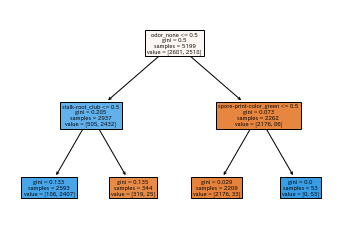

In [14]:
# 木の条件を確認する
from sklearn.tree import plot_tree
# plot_tree関数で決定木を描画
plot_tree(model, feature_names = x_train.columns,filled = True)

In [15]:
#深さを極端に深くした場合（深さ10）を確認する
model2 = tree.DecisionTreeClassifier(max_depth = 10,random_state=0)
model2.fit(x_train, y_train) # モデルの学習
model2.score(x_train, y_train) # 学習済みモデルの正解率計算

1.0

[Text(0.6111111111111112, 0.9375, 'odor_none <= 0.5\ngini = 0.5\nsamples = 5199\nvalue = [2681, 2518]'),
 Text(0.3888888888888889, 0.8125, 'stalk-root_club <= 0.5\ngini = 0.285\nsamples = 2937\nvalue = [505, 2432]'),
 Text(0.2777777777777778, 0.6875, 'stalk-root_rooted <= 0.5\ngini = 0.133\nsamples = 2593\nvalue = [186, 2407]'),
 Text(0.2222222222222222, 0.5625, 'odor_anise <= 0.5\ngini = 0.049\nsamples = 2469\nvalue = [62, 2407]'),
 Text(0.16666666666666666, 0.4375, 'spore-print-color_purple <= 0.5\ngini = 0.02\nsamples = 2432\nvalue = [25, 2407]'),
 Text(0.1111111111111111, 0.3125, 'gill-spacing_crowded <= 0.5\ngini = 0.01\nsamples = 2419\nvalue = [12, 2407]'),
 Text(0.05555555555555555, 0.1875, 'gini = 0.0\nsamples = 2345\nvalue = [0, 2345]'),
 Text(0.16666666666666666, 0.1875, 'odor_creosote <= 0.5\ngini = 0.272\nsamples = 74\nvalue = [12, 62]'),
 Text(0.1111111111111111, 0.0625, 'gini = 0.0\nsamples = 12\nvalue = [12, 0]'),
 Text(0.2222222222222222, 0.0625, 'gini = 0.0\nsamples = 

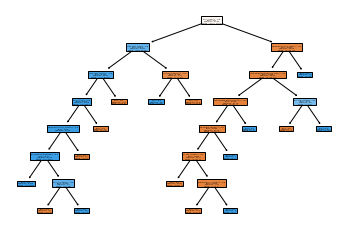

In [16]:
# 木の条件を確認する
from sklearn.tree import plot_tree
# plot_tree関数で決定木を描画
plot_tree(model2, feature_names = x_train.columns,filled = True)

#どうやら深さを10に設定しても、正解率100％になった段階で切り上げている？

In [17]:
#訓練段階の決定係数を表示
print('訓練データ：',model2.score(x_train,y_train))

#検証データで決定係数を求めて表示
print('検証データ：',model2.score(x_val,y_val))

訓練データ： 1.0
検証データ： 1.0


In [18]:
#★★実装機能要件
#★★７．正解率または決定係数の表示（未知のデータを使用して予測、判断させればさらに良い）

#最初に分離しておいた　test　のデータを使用する

#欠損値の確認
print("欠損値の個数：",test.isnull().sum().sum())
#欠損値なしを確認

#特徴量データ
xx = test.loc[:, 'cap-shape_conical':'habitat_woods']

#正解データ
tt = test[['class_poisonous']]

# 学習済みモデルの正解率計算
print("正解率：",model2.score(xx, tt))

欠損値の個数： 0
正解率： 1.0


In [28]:
#★★実装機能要件
#★★８．学習後のモデルを保存

#モデルの保存
import pickle

with open('kinoko.pkl','wb') as f:
    pickle.dump(model,f)